In [2]:
from pryngles import *

## Attic: `Pryngles` code snippets (part 2)

## Scatterers from System

It takes the same or a little bit more:

In [ ]:
#Compact version
%timeit -n 10 [self.spangle_scatterers[st][0](**{**dict(zip(self.spangle_scatterers[st][1].keys(),row[list(self.spangle_scatterers[st][1].values())].values))}).hash \
 for st in self.data.spangle_type]

In [49]:
def scat():
    Verbose.VERBOSITY=VERB_NONE
    for i in range(len(self.data)):
        row=self.data.iloc[i]
        st=row["spangle_type"]
        sc,so=self.spangle_scatterers[st]
        sp=dict()
        for p in so:
            column=so[p]
            sp[p]=row[column]
        sobj=sc(**sp)
        self.data.loc[i,"scatterer"]=sobj.hash
    Verbose.VERBOSITY=VERB_NONE

In [50]:
scat()

In [51]:
%timeit -n 10 scat()

43.3 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
sc

pryngles.scatterer.LambertianGraySurface

In [57]:
self.spangle_scatterers[st]

(pryngles.scatterer.LambertianGraySurface, {'AL': 'albedo_gray_normal'})

In [59]:
self.spangle_scatterers[st][0](**{**dict(zip(self.spangle_scatterers[st][1].keys(),
                                             row[list(self.spangle_scatterers[st][1].values())].values))}).hash

'11793885856839242781'

In [30]:
so

{'AL': 'albedo_gray_normal'}

In [36]:
row[list(so.values())].values

array([1.0], dtype=object)

In [37]:
d=dict()

In [40]:
zip(so.keys(),row[list(so.values())].values)

In [38]:
d.update(zip(so.keys(),row[list(so.values())].values))

In [52]:
LambertianGraySurface(**{**dict(zip(so.keys(),row[list(so.values())].values))}).hash

'11793885856839242781'

In [47]:
print(L)

{'params': {'AL': 1.0, 'name': 'LambertianGraySurface', 'hash': '11793885856839242781'}, 'hash': '11793885856839242781', 'phase_law': <function LambertianGraySurface.__init__.<locals>.<lambda> at 0x7fceb8028f70>, 'AL': 1.0, 'gammap0': 0.1590576171875}


## Scatterers

In [ ]:
    #Initialice scatterer
    scatterer,init_props=self.spangle_scatterers[self.__body.spangle_type]
    sprops=dict()
    for prop in init_props:
        column=init_props[prop]
        sprops[prop]=self.__body.__dict__[column]
    self.__body.scatterer=scatterer(**sprops)
            


## Old 

In [ ]:
    #Get the root of the system
    root=commonancestors(self.__body)
    if len(root)>0:
        self.root=root[0]



In [ ]:
    #Set the root body in the system.  The observer part of the conditional is for legacy purposes
    if (self.__body.parent is None) and (self.__body.kind is not "Observer"):
        if self.root:
            raise AssertionError(f"A root body has been already set in {self.root}")
        self.root=self.__body
    


In [ ]:
nspangles=1000
sps=[]
sg=Spangler(nspangles=nspangles,bhash="Star",n_equ=[0,0,1],center_ecl=[0,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_STELLAR,scale=3,seed=1,preset=1)
sps+=[sg]
sg=Spangler(nspangles=nspangles,bhash="Planet",n_equ=[0,0,1],center_ecl=[+7,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=1,seed=1,preset=True)
sps+=[sg]
sg=Spangler(nspangles=nspangles,bhash="Ring",n_equ=[1,0,-2],center_ecl=[+7,0,0])
sg.populate_spangler(shape="ring",spangle_type=SPANGLE_GRANULAR,scale=2.5,seed=1,ri=1.5/2.5,boundary=0)
sps+=[sg]
nspangles=100
sg=Spangler(nspangles=nspangles,bhash="Moon",n_equ=[0,0,1],center_equ=[+10.0,0.0,0.0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_ATMOSPHERIC,scale=0.3,seed=1,preset=True)
sps+=[sg]

sg=Spangler(spanglers=sps)

sg.set_observer(nvec=sci.direction(30,0))
sg.update_visibility_state()

sg.set_luz(nvec=sci.direction(35,0))
sg.update_illumination_state()

sg.plot2d(include=["Planet","Ring","Moon","Star"],coords="obs")

In [ ]:
var="transit_over_luz"
cond=(sg.data[var].apply(lambda x:'Star' in x))
"""
x_cen,y_cen=sg.plot2d(coords="obs",include=["Planet","Ring","Moon","Star"])
sg.ax2d.scatter(sg.data[cond].x_obs-x_cen,sg.data[cond].y_obs-y_cen,
                c='c',s=3,marker='*')
"""
len(cond),len(sg.data)
sg.plot2d(include=["Planet","Ring","Moon","Star"],coords="obs",highlight=(cond,dict()))

In [ ]:
#var="hidden_by_luz"
#var="hidden_by_obs"
#var="transit_over_obs"
var="transit_over_luz"
cond=(sg.data[var]!="")&(sg.data[var].apply(lambda x:'Star' in x))#&(sg.data[var].apply(lambda x:'Planet' in x))#
x_cen,y_cen=sg.plot2d(coords="obs",include=["Planet","Ring","Moon","Star"])
sg.ax2d.scatter(sg.data[cond].x_obs-x_cen,sg.data[cond].y_obs-y_cen,
                c='c',s=3,marker='*')

In [ ]:
sg.plot3d()
sg.ax3d.scatter(sg.data[cond].x_ecl,sg.data[cond].y_ecl,sg.data[cond].z_ecl,
                c='c',s=3,marker='*')

In [ ]:
#var="hidden_by_luz"
#var="hidden_by_obs"
#var="transit_over_obs"
var="transit_over_luz"
cond=(sg.data[var]!="")&(sg.data.bhash=="Ring")
print_df(sg.data.loc[cond,["bhash",var]])

In [ ]:
cond=(sg.data.hidden_by_luz!="")
print_df(sg.data.loc[cond,["hidden_by_luz"]])

## The physically relevant columns

In [ ]:
nspangles=100
sps=[]
sg=Spangler(nspangles=nspangles,bhash="Planet",n_equ=[0,0,1],center_ecl=[0,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=1,seed=1,preset=True)
sps+=[sg]
sg=Spangler(spanglers=sps)

sg._get_

## The issue of the areas

In [ ]:
nspangles=100

sps=[]
sg=Spangler(nspangles=nspangles,bhash="Planet1",n_equ=[0,0,1],center_ecl=[0,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=1,seed=1,preset=True)
sps+=[sg]

sg=Spangler(spanglers=sps)

sg.set_observer([0,0,1])
sg.update_visibility_state()

sg.set_luz(nvec=[0,0,1])
sg.update_illumination_state()

sg.plot2d()

## Size of convex hulls

In [ ]:
nspangles=100
sps=[]

sg=Spangler(nspangles=nspangles,bhash="Planet1",n_equ=[0,0,1],center_ecl=[0,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=1,seed=1,preset=True)
sps+=[sg]

sg=Spangler(nspangles=nspangles,bhash="Moon1",n_equ=[0,0,1],center_ecl=[2,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=0.5,seed=1,preset=True)
sps+=[sg]

sg=Spangler(spanglers=sps)

sg.set_observer([1,1,1])
sg.update_visibility_state()

bhash="Planet1"
sg.set_luz(nvec=[1,0,0],bhash=bhash)
sg.update_illumination_state()

sg.plot3d()

In [ ]:
bhash="Planet1"
sg.set_luz(nvec=[1,0,0],center=[5,0,0],bhash=bhash)
sg.update_illumination_state()
sg.plot3d(coords="luz")
sg._plot_qhulls()

## Animate

In [ ]:
nspangles=1000
sps=[]
sg=Spangler(nspangles=nspangles,bhash="Star",n_equ=[0,0,1],center_ecl=[0,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_STELLAR,scale=3,seed=1,preset=1)
sps+=[sg]
sg=Spangler(nspangles=nspangles,bhash="Planet",n_equ=[0,0,1],center_ecl=[+7,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=1,seed=1,preset=True)
sps+=[sg]
sg=Spangler(nspangles=nspangles,bhash="Ring",n_equ=[1,0,-2],center_ecl=[+7,0,0])
sg.populate_spangler(shape="ring",spangle_type=SPANGLE_GRANULAR,scale=2.5,seed=1,ri=1.5/2.5,boundary=0)
sps+=[sg]
sg=Spangler(nspangles=nspangles,bhash="Moon",n_equ=[0,0,1],center_equ=[+10.0,0.0,0.0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_ATMOSPHERIC,scale=0.3,seed=1,preset=True)
sps+=[sg]

sg=Spangler(spanglers=sps)

sg.set_observer(nvec=sci.direction(30,0))
sg.update_visibility_state()
sg.set_luz(nvec=sci.direction(0,0))
sg.update_illumination_state()

for i,t in enumerate(tqdm(np.linspace(0,360,50))):
    sg.reset_state()
    sg.set_observer(nvec=sci.direction(30,0))
    sg.update_visibility_state()
    sg.set_luz(nvec=sci.direction(t,0))
    sg.update_illumination_state()
    if i==0:
        del sg.fig2d
    sg.plot2d(include=["Planet","Ring","Moon"],show_azim=0,newfig=False,axis=0)
    sg.ax2d.text(0,0,f"Hola {t}",transform=sg.ax2d.transAxes)
    if i==0:
        camera=Camera(sg.fig2d)
    else:
        camera.snap()

In [ ]:
anim=camera.animate(interval=50,repeat=True,blit=False)
anim.save("tmp/illumination-animation.gif")
from IPython.display import Image
Image(open("tmp/illumination-animation.gif","rb").read())

In [ ]:
#Default colors
PLANET_COLOR="#D3CAAF"
STAR_COLOR="#FDFE7D"
RING_COLOR="#DBD5D1"

In [ ]:
BTREE=[]
def initialize_simulation(self,body):
    
    print(f"Initializing {body.bhash}")
    
    #Check if body has childs
    if not body.childs:
        
        print(f"Arriving to leaf...")
        
        elements=body.orbit.copy()
        m=elements["m"]
        del elements["m"]
    
        return m,elements
    
    else:
        #Create orbital initial conditions for this system
        child=body.childs[0]
        
        for bhash,child in body.childs.items():

            print(f"Descending into branch...")
            if child.kind=="Ring":
                print(f"Skipping ring")
                continue

            #Create orbit for child
            orbit,elements=self.initialize_simulation(child)

            #Add tree
            btree=dict(m1=body.m,m2=orbit)
            btree.update(elements)
            print(f"Initializing orbit with: {btree}")

            #Create orbit
            orbit=Orbit(**btree)
            systems+=[orbit]
        
        return orbit,elements

System.initialize_simulation=initialize_simulation

In [ ]:
def build_tree(self,body,branch):
    
    #Get properties of body
    bhash=body.bhash
    elements=body.orbit.copy()
    m=elements["m"]
    del elements["m"]
    
    #Add body to provided branch
    print(f"Adding object {bhash}")
    branch+=[[body.bhash,m,elements]]

    #Descend into childs
    if body.childs:
        print(f"Descending into childs of {bhash}")
        branches=[]
        for cbhash,child in body.childs.items():
            if child.kind=="Ring":
                continue
            cbranch=[]
            self.build_tree(child,cbranch)
            branches+=[cbranch]
        branch+=[branches]
    
System.build_tree=build_tree

In [ ]:
    #Set other properties
    if kind == "Star":
        
        if self.source:
            raise AssertionError("Present version of Pryngles only works with one star per system")
            
        #Add the source of light
        self.source=self.__body
    
        """
        #Add body to simulation
        rb_add_options={k:v for k,v in self.__body.__dict__.items() if k in REBOUND_ORBITAL_PROPERTIES}
        rb_add_options.update(hash=self.__body.bhash)
        
        verbose(VERB_VERIFY,f"Adding rebound object with hash {self.__body.bhash}")
        verbose(VERB_DEEP,f"Rebound add options {rb_add_options}")
        
        #Add particle to rebound
        self.sim.add(**rb_add_options)
        """
        
        #self.__body.particle=self.sim.particles[self.__body.hash] <- This is not convenient for pickling


## Orbital tree

In [187]:
from anytree import ZigZagGroupIter,AsciiStyle
class OrbitalBody(PrynglesCommon,NodeMixin):
    
    def __init__(self,parent=None,name=None,m=1,**elements):
        self.parent=parent
        self.m=m
        self.name='body' if name is None else name
        
        #Add initial elements to attributes
        for element in elements:
            if element in REBOUND_ORBITAL_PROPERTIES:
                self.__dict__[element]=elements[element]
            else:
                raise ValueError(f"Element {element} not identified.")
        self.elements=elements

    def show_tree(self):
        print(RenderTree(self))

    def reverse_leafs(self):
        return list(ZigZagGroupIter(self))[::-1]

    def get_leafs(self):
        leafs=list(ZigZagGroupIter(self))[::-1][0]
        return leafs
    
    
        
class HierarchicalSystem(PrynglesCommon):
    
    def __init__(self,units=None,parent=None):

        #Global simulation
        self.sim=rb.Simulation()
        if units:
            self.units=units
        else:
            self.units=["au","msun","yr2pi"]
        self.sim.units=self.units
        
        self.parent=parent

    def add(self,**body):
        body=OrbitalBody(**body)
        return body

In [305]:
units=['au','msun','yr2pi']
hsys=HierarchicalSystem(units=units)

s1=hsys.add(name='s1',m=1,a=1,e=0.2)
s2=hsys.add(name='s2',parent=s1,m=1,a=2,e=0.2)
ps1=hsys.add(name='ps2',parent=s1,m=0.01,a=0.2,e=0.2)
mps1=hsys.add(name='mps1',parent=ps1,m=0.001,a=0.01,e=0.5)
ps2=hsys.add(name='ps1',parent=s2,m=0.01,a=0.2,e=0.2)
"""
m1=hsys.add(name='m1',parent=p,m=0.01,a=0.1,e=0.5)
sm11=hsys.add(name='sm11',parent=m1,m=0.005,a=0.01,e=0.1)
m2=hsys.add(name='m2',parent=p,m=0.03,a=0.2,e=0.1)
sm21=hsys.add(name='sm21',parent=m2,m=0.005,a=0.01,e=0.1)
sm22=hsys.add(name='sm22',parent=m2,m=0.005,a=0.03,e=0.2)
#hsys.show_tree()
#Hierarchical.calculate_orbits()
""";

In [306]:
s1.show_tree()

├── <__main__.OrbitalBody object at 0x7fbc38e43f10>
│   └── <__main__.OrbitalBody object at 0x7fbc5f73a970>
└── <__main__.OrbitalBody object at 0x7fbc5f73aa30>
    └── <__main__.OrbitalBody object at 0x7fbc5f73aa00>


In [299]:
orbit_name=dict()
orbit=dict()
for i,levels in enumerate(s1.reverse_leafs()):
    print(f"Level {i}: {levels}")
    included=[]
    for b in levels:
        if b.name in included:
            print(f"Skipping {b.name}")
        if b.parent is None:
            break
        p=b.parent
        p_name=f"{p.name}&{b.name}"
        if p.name in orbit_name:
            p_orbit=orbit_name[p.name]
            p_orbit_sim=orbit[p.name]
        else:
            p_orbit=f"Orbit(name='{p_name}',m1={p.m},m2={b.m},{b.elements})"
            p_orbit_sim=Orbit(name=p_name,m1=p.m,m2=b.m,units=units,**b.elements)
            
        included+=[p.name,b.name]
        print(f"Children: {p.children}")
        for c in p.children:
            print(f"Adding {c.name}")
            if c.name in included:
                print(f"Skipping {c.name}")
                continue
            else:
                c_name=f"({p_name})&{c.name}"
                if c.name in orbit_name:
                    c_orbit=orbit_name[c.name]
                    c_orbit_sim=orbit[c.name]
                else:
                    c_orbit=c.m
                    c_orbit_sim=c.m
                    
                orbit_name[p.name]=f"Orbit(name='{c_name}',m1={p_orbit},m2={c_orbit},{c.elements})"
                orbit[p.name]=Orbit(name=c_name,m1=p_orbit_sim,m2=c_orbit_sim,units=units,**c.elements)
                included+=[c.name]
                
        if p.name not in orbit_name:
            orbit_name[p.name]=p_orbit
            orbit[p.name]=p_orbit_sim

Level 0: (<__main__.OrbitalBody object at 0x7fbc4c35ebe0>, <__main__.OrbitalBody object at 0x7fbc4c35ef70>)
Children: (<__main__.OrbitalBody object at 0x7fbc4c35ebe0>,)
Adding ps1
Skipping ps1
Children: (<__main__.OrbitalBody object at 0x7fbc4c35ef70>,)
Adding mps1
Skipping mps1
Level 1: (<__main__.OrbitalBody object at 0x7fbc4c35e9a0>, <__main__.OrbitalBody object at 0x7fbc4bc93190>)
Children: (<__main__.OrbitalBody object at 0x7fbc4bc93190>, <__main__.OrbitalBody object at 0x7fbc4c35e9a0>)
Adding s2
Adding ps2
Skipping ps2
Skipping s2
Children: (<__main__.OrbitalBody object at 0x7fbc4bc93190>, <__main__.OrbitalBody object at 0x7fbc4c35e9a0>)
Adding s2
Skipping s2
Adding ps2
Skipping ps2
Level 2: (<__main__.OrbitalBody object at 0x7fbc5f470850>,)


## Animation Spangler

In [3]:
def _animate_plot2d(self,filename=None,
                   nobs=[[0,0,1]],nluz=[[1,0,0]],
                   interval=1000,
                   **plot2d_args):
    """Animate plot2d observation
    
    Parameters:
        filename: string, default = None:
            File where the movie will be stored. If None not file generated.
            The extension of the file will determine the format on which
            the animation is stored.
            
        nobs: array (Nx3), default = None:
            Set of directions in which the observer is set.
            
        nluz: array (Nluz x 3), default = None
            Set of directions in which the light will be set.
            
        interval: float, default = 100:
            Interval in milliseconds between frames.
            
        **plot_args: dictionary:
            Arguments for the plot2d method
    
    Return:
        anim: Class Animation:
            Animation object.
            
        combinations: list of tuples:
            Combinations of nobs and nluz components.
    
    Example:
        nobs=sci.calc_flyby(normal=[0,1,1],start=0,stop=360,num=20)
        sg.animate_plot2d(nobs=nobs)
        
    Notes:
        Based in: https://github.com/jwkvam/celluloid
    """
    
    verbosity=Verbose.VERBOSITY
    Verbose.VERBOSITY=VERB_NONE
    
    self.reset_state()

    self.set_observer(nvec=nobs[0])
    self.update_visibility_state()

    self.set_luz(nvec=nluz[0])
    self.update_illumination_state()

    plot2d_args.update(dict(newfig=False))
    self.plot2d(**plot2d_args)
    
    print(f"Generating {len(nobs)*len(nluz)} frames... be patient")
    
    camera=Camera(self.fig2d)
    
    directions=[nobs]+[nluz]
    combinations=[]
    for direction in tqdm(itertools.product(*directions)):

        self.reset_state()

        self.set_observer(nvec=direction[0])
        self.update_visibility_state()

        self.set_luz(nvec=direction[1])
        self.update_illumination_state()

        self.plot2d(**plot2d_args)
            
        camera.snap()
        combinations+=[direction]
        
    anim=camera.animate(interval=interval)

    Verbose.VERBOSITY=verbosity
        
    if filename is not None:
        if 'gif' in filename:
            anim.save(filename)
            return anim,combinations
        elif 'mp4' in filename:
            ffmpeg=animation.writers["ffmpeg"]
            metadata = dict(title='Pryngles Spangler Animation',
                            artist='Matplotlib',
                            comment='Movie')
            w=ffmpeg(fps=15,metadata=metadata)
            anim.save(filename,w)
            return anim,combinations
        else:
            raise ValueError(f"Animation format '{filename}' not recognized")
    else:
        return anim,combinations

def _interact_plot2d(self,
                     lon_luz=70,lat_luz=0,lon_obs=35,lat_obs=20,
                     **plot2d_args):
    verbosity=Verbose.VERBOSITY
    Verbose.VERBOSITY=VERB_NONE

    #Interact
    def visuals_interact(lon_luz=0,lat_luz=0,lon_obs=0,lat_obs=0):

        lon_luz=float(lon_luz)
        lat_luz=float(lat_luz)
        lon_obs=float(lon_obs)
        lat_obs=float(lat_obs)

        #Plot
        self.reset_state()
        self.set_luz(nvec=sci.direction(lon_luz,lat_luz))
        self.update_illumination_state()

        self.set_observer(nvec=sci.direction(lon_obs,lat_obs))
        self.update_visibility_state()

        self.plot2d(**plot2d_args)

    opciones=dict(continuous_update=False,readout_format=".3f")
    interact(visuals_interact,
             lon_luz=widgets.FloatSlider(min=0,max=360,step=0.01,value=lon_luz,**opciones),
             lat_luz=widgets.FloatSlider(min=-90,max=90,step=0.01,value=lat_luz,**opciones),
             lon_obs=widgets.FloatSlider(min=0,max=360,step=0.01,value=lon_obs,**opciones),
             lat_obs=widgets.FloatSlider(min=-90,max=90,step=0.01,value=lat_obs,**opciones),
            );

    Verbose.VERBOSITY=verbosity
    
Spangler._interact_plot2d=_interact_plot2d
Spangler._animate_plot2d=_animate_plot2d

## System

In [ ]:
def animate_integration(self,filename=None,tini=0,tend=2*np.pi,nsnap=10,interval=100,coords="obs"):

    verbosity=Verbose.VERBOSITY
    Verbose.VERBOSITY=VERB_NONE
    
    self.sg.fig2d=None
    self.sg.plot2d(coords=coords,axis=False,newfig=False)
    camera=Camera(self.sg.fig2d)
    
    for t in tqdm(np.linspace(tini,tend,nsnap)):
        self.integrate(t)
        self._set_observer(nvec=self.n_obs)
        self._set_luz()
        self.sg.plot2d(coords=coords,axis=False,newfig=False)
        camera.snap()
    
    anim=camera.animate(interval=interval)
    
    Verbose.VERBOSITY=verbosity
    
    if filename is not None:
        if 'gif' in filename:
            anim.save(filename)
            return anim
        elif 'mp4' in filename:
            ffmpeg=animation.writers["ffmpeg"]
            metadata = dict(title='Pryngles Spangler Animation',
                            artist='Matplotlib',
                            comment='Movie')
            w=ffmpeg(fps=15,metadata=metadata)
            anim.save(filename,w)
            return anim
        else:
            raise ValueError(f"Animation format '{filename}' not recognized")
    else:
        return anim
    
System.animate_integration=animate_integration

For having multiple light-sources:

In [ ]:
#Add column for controlling information on sources
for source in range(1,self.nsources+1):
    for source_state in SPANGLER_SOURCE_STATES.keys():
        new_column=source_state+f"_{source}"
        self.sg.data[new_column]=False

<IPython.core.display.Javascript object>


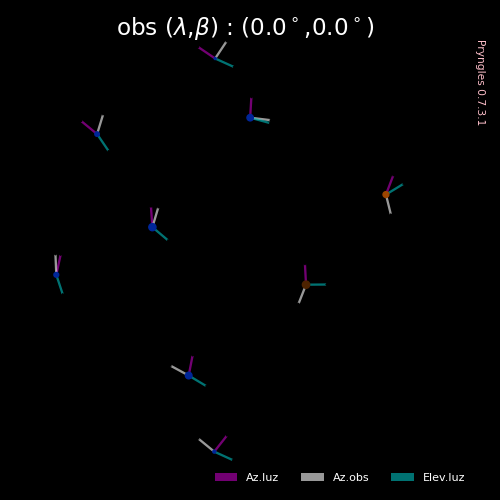

<IPython.core.display.Javascript object>


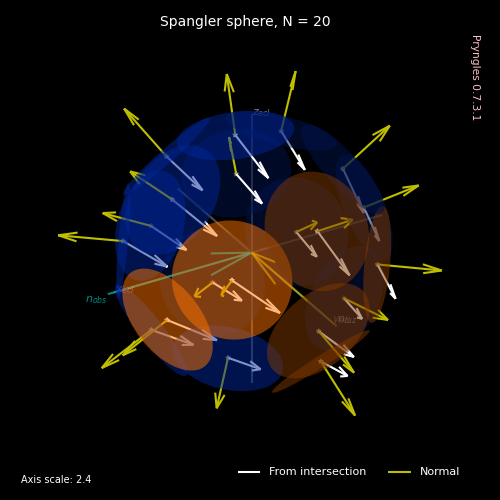

In [2]:
#Figure of paper
sg=Spangler(nspangles=20,bhash="123",n_equ=[1,1,1],center_ecl=[0,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=2,seed=1,preset=0)
sg.set_observer(nvec=[1,0,0])
sg.set_luz(nvec=[0,1,0],center=[0,6,0])
sg.plot2d(show_azim=True,fsize=5)
sg.plot3d(coords="ecl",show_directions=True)